# SciPy (Mr. P Solver)

Video Link: https://youtu.be/jmX4FOUEfgU

Codes: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbS01X0lmZVhJbGpVdVVVblZEb2lWdWx1Q0NEQXxBQ3Jtc0tsb1RpcjRPOGJJZ2NGbVFTYXpvZkNxNm1CNXh6VTJOVzVCdm81R3ByM2V1SXFSLVVpdzJNd1p5Q0h3dDU0T0ZwWllvbk9uXzF2RndrclFmYXljVXFGc0Y4N1huV1FzN2NHYzZsVlBzWV9vOEdxWHFJcw&q=https%3A%2F%2Fgithub.com%2Flukepolson%2Fyoutube_channel%2Fblob%2Fmain%2FPython%2520Tutorial%2520Series%2Fscipy_essentials.ipynb&v=jmX4FOUEfgU

SciPy means SCIENTIFIC PYTHON.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Basics

**Optimization**

In [2]:
from scipy.optimize import minimize

In [3]:
minimize

<function scipy.optimize._minimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)>

run 'minimize?' to know all about it.

Minimize $ f(x) = (x-3)^2 $

In [4]:
def f(x):
    return (x-3)**2
ans= minimize(f,5)

In [5]:
ans.x

array([2.99999998])

Minimize $ f(x, y) = (x-1)^2 + (y-2.5)^2 $ subject to
$$ x-2y+2 \geq 0 $$ $$ -x-2y+6 \geq 0 $$ $$ -x + 2y + 2 \geq 0 $$ $$ x \geq 0 , y \geq 0 $$

2D function takes in vector $x$

Constraints must be specified as $g_i(x) \geq 0$

Bounds specified as rectangular

In [6]:
f= lambda x: (x[0]-1)**2 + (x[1]-2.5)**2
# constraints
cons= ({'type': 'ineq', 'fun': lambda x: x[0] - 2 * x[1] + 2}, 
       {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6}, 
       {'type': 'ineq', 'fun': lambda x: -x[0] +2*x[1] +2})
# bounds: x is in (0, inf) and y is in (0, inf) 
bnds= ((0,None), (0, None))
ans= minimize(f, (7,5), bounds=bnds, constraints=cons)

In [7]:
f([5,4])

18.25

In [8]:
ans.x

array([1.39999999, 1.7       ])

## Interpolation

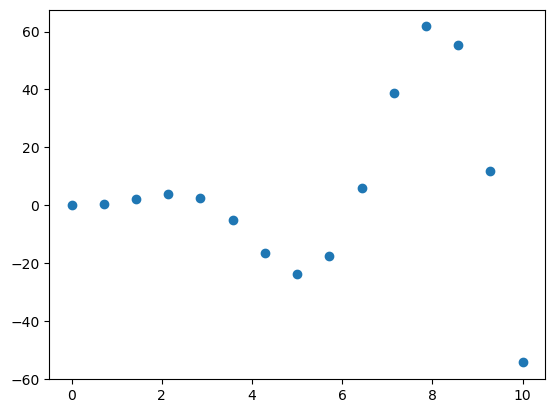

In [9]:
x= np.linspace(0,10,15)
y= x**2 * np.sin(x) + 0.02
plt.scatter(x,y)

We want to know the values in between

In [10]:
from scipy.interpolate import interp1d

In [11]:
intr1 = interp1d(x,y, kind='linear')
x1= np.linspace(0,10,50)
y1 = intr1(x1)
intr2 = interp1d(x,y, kind='cubic')
x2= np.linspace(0,10,50)
y2 = intr2(x2)

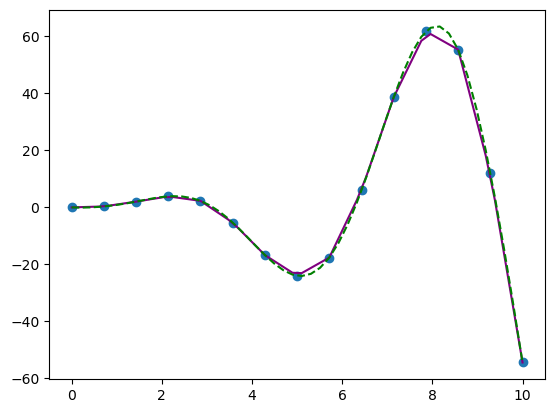

In [12]:
plt.scatter(x,y)
plt.plot(x1,y1, color='purple')
plt.plot(x2,y2, '--', color='green')
plt.show()

### Curve Fitting

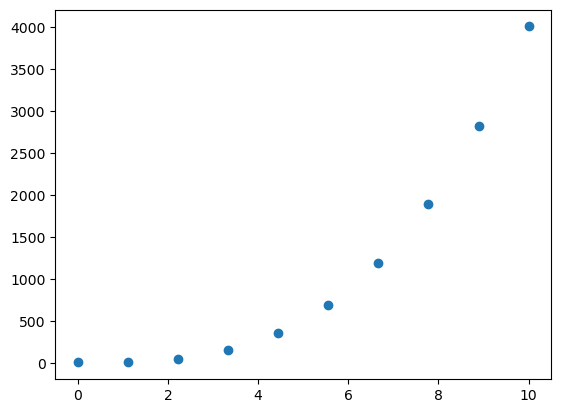

In [13]:
xdata= np.linspace(0,10,10)
ydata= 4*xdata**3 + 6
plt.scatter(xdata, ydata)

We want to fit the data to the curve $y = ax^2 + b$, and determine the values of a and b.

In [14]:
from scipy.optimize import curve_fit

In [15]:
def fn(x,a,b):
    return a*x**2 +b
# optimal parameters i.e. values of a and b and covariance parameters
optp, covp = curve_fit(fn, xdata, ydata, p0= (3,3))

In [16]:
optp

array([  38.90160182, -251.648953  ])

In [17]:
covp # what is it ?

array([[ 5.45418498e+00, -1.91906509e+02],
       [-1.91906509e+02,  1.27463829e+04]])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the following data.

In [18]:
tdata = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
ydata = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

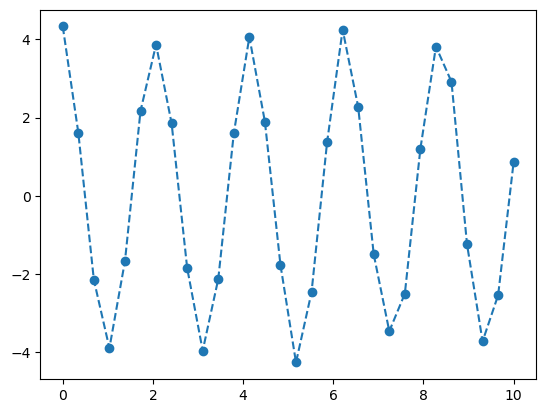

In [19]:
plt.plot(tdata, ydata, 'o--')

$ \omega = 2 \pi f, f=1/T and T \approx 2s $. Thus good initial guess is
$$ \omega = 2 \pi (1/2) = \pi, A=4 \space and \space \phi = 0 $$

In [20]:
def f(t,A,w, phi):
    return A*np.cos(w*t +phi)
optp, covp = curve_fit(f, tdata, ydata, p0=(4, np.pi, 0))

In [21]:
optp

array([3.94836219, 2.99899521, 0.10411352])

In [22]:
A, w, phi = optp

In [23]:
t= np.linspace(0,10,100)
y= f(t,A,w, phi)

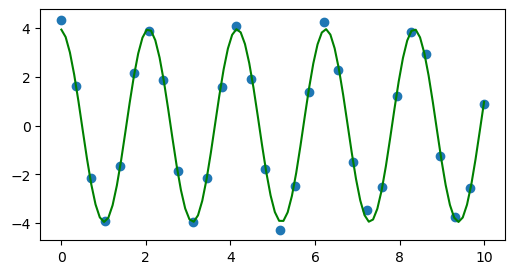

In [24]:
plt.figure(figsize=(6,3))
plt.scatter(tdata,ydata)
plt.plot(t,y,color='g')
plt.show()

In [25]:
w

2.998995205451252

In [26]:
error = np.sqrt(np.diag(covp))  # std deviation
errA, errw, errphi = error

In [27]:
error

array([0.05117448, 0.00430857, 0.02575701])

In [28]:
errw

0.004308565132396146

## Special Functions

### Legendre Polynomials, $ P_l(x) $

Satisfy $ (1-x^2)y'' -2xy'+l(l+1)y = 0 $**

In [29]:
from scipy.special import legendre

In [30]:
x= np.linspace(0,1,60)
P1= legendre(1)(x)
P2= legendre(2)(x)
P3= legendre(3)(x)
P4= legendre(4)(x)
P5= legendre(5)(x)
P6= legendre(6)(x)

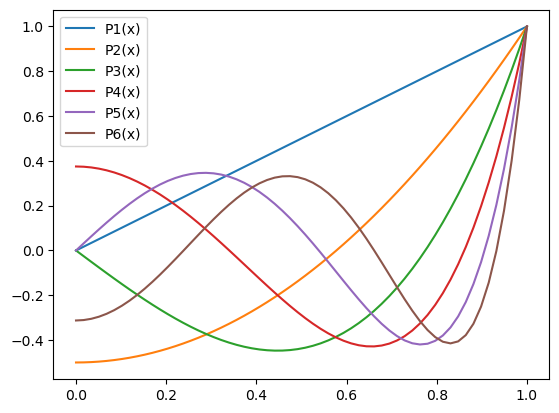

In [31]:
plt.plot(x, P1, label='P1(x)')
plt.plot(x, P2, label='P2(x)')
plt.plot(x, P3, label='P3(x)')
plt.plot(x, P4, label='P4(x)')
plt.plot(x, P5, label='P5(x)')
plt.plot(x, P6, label='P6(x)')
plt.legend()
plt.show()

### Bessel Functions, $ J_{\alpha}(x) $

Satisfy $ x^2 y'' + xy' + (x^2-\alpha^2)y = 0 $

In [32]:
from scipy.special import jv

In [33]:
x= np.linspace(0,10,40)
J1= jv(1,x)
J2= jv(2,x)
J3= jv(3,x)
J4= jv(4,x)

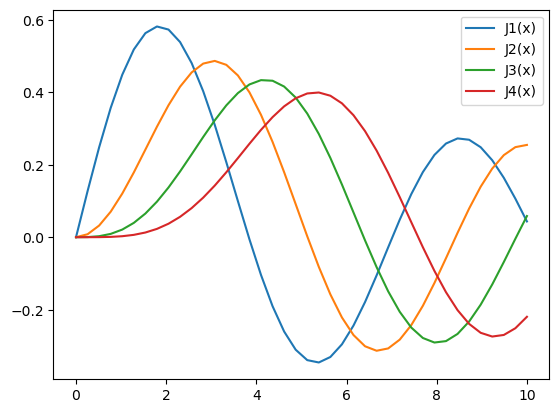

In [34]:
plt.plot(x, J1, label='J1(x)')
plt.plot(x, J2, label='J2(x)')
plt.plot(x, J3, label='J3(x)')
plt.plot(x, J4, label='J4(x)')
plt.legend()
plt.show()

## CALCULUS

### Differentiation

In [35]:
from scipy.misc import derivative

In [36]:
def f(x):
    return x**3 * np.sin(3*x) * np.exp(-x**2)
x= np.linspace(0,4,100)
f1 = derivative(f, x, dx= 1e-3)
f2 = derivative(f, x, dx= 1e-3, n=2)

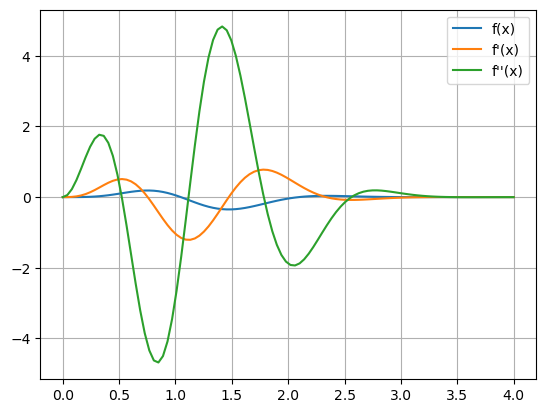

In [37]:
plt.plot(x, f(x), label='f(x)')
plt.plot(x, f1, label='f\'(x)')
plt.plot(x, f2, label='f\'\'(x)')
plt.legend()
plt.grid()
plt.show()

### Integration

**Single integrals** $$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [38]:
from scipy.integrate import quad

In [39]:
intg= lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, integral_error = quad(intg, 0, 1)

In [40]:
integral

0.10246777930717413

In [41]:
integral_error

1.1376208786903388e-15

**Double integrals** $$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [42]:
from scipy.integrate import dblquad

In [43]:
int2 = lambda y,x: np.sin(x + y**2)
llim_y = lambda x: -x
ulim_y = lambda x: x**2
integral, integral_error = dblquad(int2, 0, 1, llim_y, ulim_y)

In [44]:
integral

0.590090324408853

In [45]:
integral_error

2.0545915475811425e-14

**nth order integrals**

In [46]:
from scipy.integrate import nquad

run "nquad?" to know all about this.

try an triple integral by nquad

## Differetial Equations

### First Order ODEs

Air friction while falling considered here. 
$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0 $$

In [47]:
from scipy.integrate import odeint

defining the differential equation and the boundary conditions.

In [48]:
def dvdt(v,t):
    return 4*v**2 - 10
v0 = 0

solving

In [49]:
t= np.linspace(0,1,20)
soln = odeint(dvdt, v0, t)

converting solution to a suitable array

In [50]:
v_t = soln.T[0]

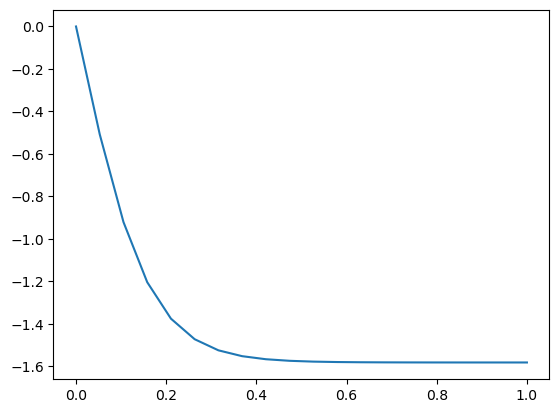

In [51]:
plt.plot(t, v_t)

### Coupled first order ODEs

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0 $$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0 $$

Letting $ S=(y_1,y_2) $ we need to write a function that returns $ dS/dx (dy_1/dx, dy_2/dx) $. The function $ dS/dx $ can take in $ S=(y_1, y_2) $ and $x$.

In [52]:
def dSdx(S,x):
    y1, y2 = S
    return [y1 + y2**2 + 3*x, 3*y1 + y2**3 - np.cos(x)]
y1_0, y2_0 = 0,0
S_0 = (y1_0, y2_0)

In [53]:
x = np.linspace(0,1,20)
soln = odeint(dSdx, S_0, x)

In [54]:
y1_x = soln.T[0]
y2_x = soln.T[1]

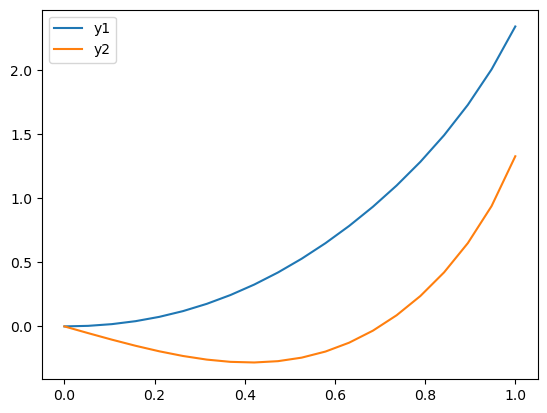

In [55]:
plt.plot(x, y1_x, label='y1')
plt.plot(x, y2_x, label='y2')
plt.legend()
plt.show()

### Second Order ODEs

Equation for a pendulum - $$ \theta'' - \sin(\theta) = 0 $$

Scipy can *only* solve coupled first order ODEs, but *any second order ODE can be turned into two coupled first order ODEs*. The same thing goes for higher order ODEs.

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs
$$d \theta / dt = \omega$$ $$d \omega / dt = \sin(\theta)$$ 
Let $S = (\theta, \omega)$

In [56]:
def dSdt(S,t):
    theta, omega = S
    return [omega, np.sin(theta)]
theta0 = np.pi/3   # initial condition
omega0 = 0
S0 = (theta0, omega0)

In [57]:
t= np.linspace(0, 30, 100)
soln = odeint(dSdt, S0, t)

In [58]:
theta, omega = soln.T

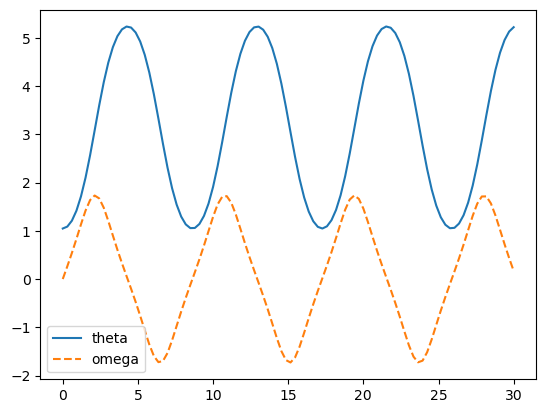

In [59]:
plt.plot(t, theta, label='theta')
plt.plot(t, omega, '--', label='omega')
plt.legend()

## Fourier Transform
Discrete Fourier transform is defined as,
$$ y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$
- $k/N$ represents a specific frequency (dimensionless)
- can be converted to a frequency if spacing in $x$ is known.

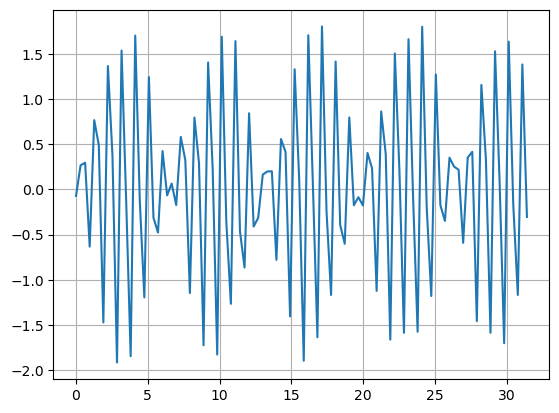

In [101]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + 0.1*np.random.randn(len(t))
plt.plot(t, x)
plt.grid()
plt.show()

In [102]:
from scipy.fft import fft, fftfreq

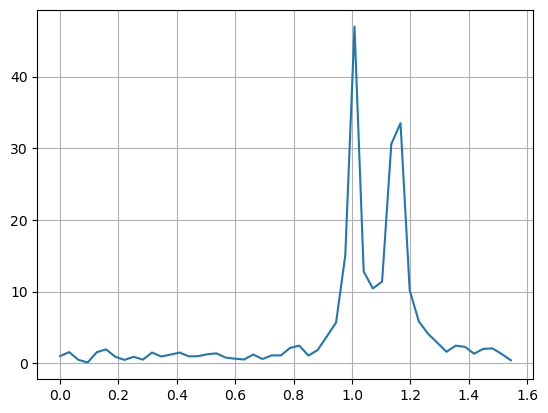

In [106]:
N = len(t)
f = fftfreq(N, np.diff(t)[0])[:N//2]
y = fft(x)[:N//2]
plt.plot(f, np.abs(y))
plt.grid()
plt.show()

## Examples

**Example 1**

In [60]:
def func(A):
    intg= lambda t: 5* (1 + (np.pi*A/10)**2 * (np.cos(np.pi*t/10))**2)**0.5 + 2/(A*np.sin(np.pi*t/10) + 100)**2
    return quad(intg,0,10)[0]
minimize(func,0.001).x

array([1.02735846e-05])

In [61]:
E = quad(intg,0,10)[0]
E

0.5035272509544617

**Example 2**

Newton's law of cooling is $$ \frac{dT}{dt} = -k(T-T_s(t)) $$

In [62]:
tdata = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])  # in hours

Tdata = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

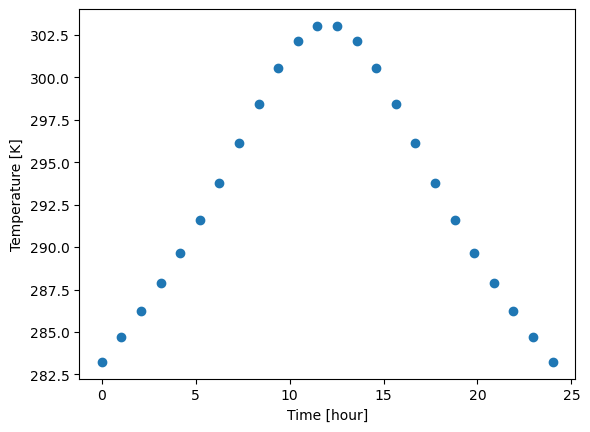

In [63]:
plt.scatter(tdata, Tdata)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [64]:
Ts= interp1d(tdata,Tdata, kind='cubic')

In [65]:
Tdata, Ts(tdata)  # creating the function Ts(t) by interpolation

(array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
        291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
        302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
        298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
        287.8603625, 286.2259041, 284.6945461, 283.2322975]),
 array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
        291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
        302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
        298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
        287.8603625, 286.2259041, 284.6945461, 283.2322975]))

In [66]:
def dTdt(T,t):
    return -0.5*(T-Ts(t))

ts = np.linspace(0.2,23.8,100)
T0= 284

In [67]:
Tsoln = odeint(dTdt, T0, ts).T[0]

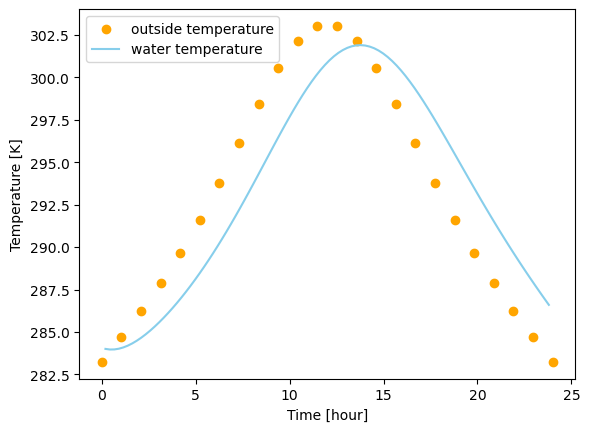

In [68]:
plt.scatter(tdata, Tdata, color='orange', label='outside temperature')
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')
plt.plot(ts, Tsoln, color='skyblue', label='water temperature')
plt.legend()
plt.show()

## Linear Algebra

### Basics

Triangular matrices $$ \begin{bmatrix} 3 & 0 & 0 & 0\\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix} $$

In [69]:
from scipy.linalg import solve_triangular
A = np.array([[3,0,0,0],[2,1,0,0],[1,0,1,0],[1,1,1,1]])
B = np.array([4,2,4,2])
X = solve_triangular(A, B, lower=True)
X

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

Toeplitz Matrices (matrices with constant diagonals)
$$ \begin{bmatrix} 1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix} $$

In [70]:
from scipy.linalg import toeplitz, solve_toeplitz
cl = np.array([1,3,6,10])  # 1st column
rw = np.array([1,-1,2,3])  # 1st row
B = np.array([1,2,2,5])
X = solve_toeplitz((cl,rw),B)
X

array([ 0.17741935,  0.48387097, -0.0483871 ,  0.46774194])

### Eigenvalue Problems

Eigenvalue problems can be solved using numpy, so here we focus on particular cases for optimization

In [71]:
from scipy.linalg import eigh_tridiagonal

$$ \begin{bmatrix} 3 & -1 & 0 & 0\\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda x $$

In [72]:
d = 3* np.ones(4)
e = -1* np.ones(3)
w, v = eigh_tridiagonal(d,e)

In [73]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A  # making of the matrix

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [74]:
w, v.T  # eigrnvalues and corresponding eigenvectors

(array([1.38196601, 2.38196601, 3.61803399, 4.61803399]),
 array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
        [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
        [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
        [-0.37174803,  0.60150096, -0.60150096,  0.37174803]]))

In [75]:
A @ v.T[0], w[0] * v.T[0]  # verification of eigenvalue equation

(array([0.51374315, 0.83125388, 0.83125388, 0.51374315]),
 array([0.51374315, 0.83125388, 0.83125388, 0.51374315]))

### Special Matrices

Fiedler matrix $ A_{ij} = |a_i - a_j| $ where $ a_i $ is some sequence of numbers.

In [76]:
from scipy.linalg import fiedler
fiedler([5,3,1,4])

array([[0, 2, 4, 1],
       [2, 0, 2, 1],
       [4, 2, 0, 3],
       [1, 1, 3, 0]])

Toeplitz matrices (matrices with constant diagonals)

In [77]:
from scipy.linalg import toeplitz
toeplitz([4,3,8],[4,8,0]) # (columns, rows)

array([[4, 8, 0],
       [3, 4, 8],
       [8, 3, 4]])

See other types of matrices https://docs.scipy.org/doc/scipy/reference/linalg.html#special-matrices

### Decompositions

**LU** decomposition: $ A=PLU $ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [78]:
from scipy.linalg import lu
A = np.array([[69,3,0],[6,4,1],[3,0,9]])

In [79]:
P, L, U = lu(A)

In [80]:
P, L, U

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[ 1.        ,  0.        ,  0.        ],
        [ 0.08695652,  1.        ,  0.        ],
        [ 0.04347826, -0.03488372,  1.        ]]),
 array([[69.        ,  3.        ,  0.        ],
        [ 0.        ,  3.73913043,  1.        ],
        [ 0.        ,  0.        ,  9.03488372]]))

Choleski decomposition: find matrix $C$ such that $ A = CC^T $.

In [81]:
from scipy.linalg import cholesky
A = np.array([[69,3,0],[6,4,1],[3,0,9]])
C = cholesky(A, lower=True)

In [82]:
C

array([[ 8.30662386,  0.        ,  0.        ],
       [ 0.72231512,  1.86500962,  0.        ],
       [ 0.36115756, -0.13987572,  2.97489496]])

In [83]:
C @ C.T  # verification

array([[6.90000000e+01, 6.00000000e+00, 3.00000000e+00],
       [6.00000000e+00, 4.00000000e+00, 1.17319166e-17],
       [3.00000000e+00, 1.17319166e-17, 9.00000000e+00]])

### Sparse Matrices

Matrices that contain lots of zeros (so lots of space can be reduced)

**Do it later when needed.**

## Statistics

**$\beta$ distribution**
$$ f(x; a, b) = \frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \hspace{20mm} 0 \leq x \leq 1 $$

In [84]:
from scipy.stats import beta

Basic Statistics

In [85]:
a, b = 10, 12

In [86]:
mean, var, skew, kurt = beta.stats(a,b, moments='mvsk')

In [87]:
mean

array(0.45454545)

Probability Distribution Plotting:

In [88]:
x= np.linspace(beta.ppf(0,a,b), beta.ppf(1,a,b), 100) 

In beta.pdf the 1st arguement is input fraction of area and the out put is value of x between (a,b) separating the fractiin of area. To know more input 'beta.ppf?'.

Text(0, 0.5, '$\\beta(x)$')

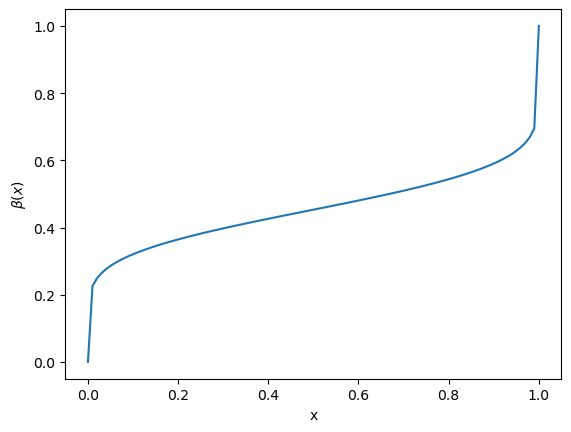

In [89]:
plt.plot(x,beta.ppf(x,a,b))
plt.xlabel('x')
plt.ylabel(r'$\beta(x)$')

*Graph not matched !!*

Generating Random Variables:

In [90]:
r = beta.rvs(a,b, size=10)
r

array([0.41030961, 0.56860578, 0.43441373, 0.48207474, 0.61954787,
       0.4438704 , 0.58701016, 0.29748753, 0.44993477, 0.52583804])

**Gaussian Distribution**
$$ f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{exp}\left(-\frac{(x-\mu)^2}{\sigma^2} \right) \hspace{20mm} -\infty < x \leq \infty $$

In [91]:
from scipy.stats import norm

In [92]:
mu = 1
sigma = 3
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

In [93]:
mean, var

(array(1.), array(9.))

Text(0, 0.5, 'Gaussian')

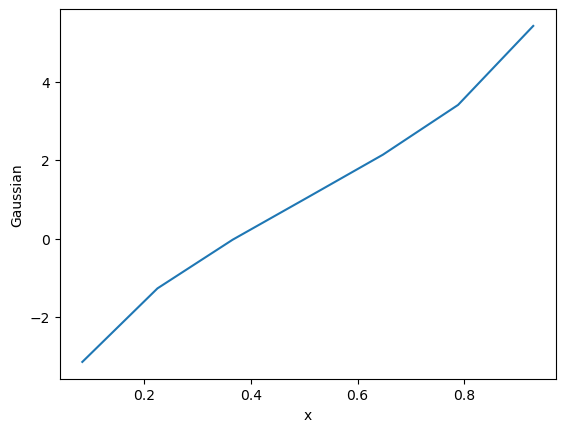

In [94]:
x= np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x,norm.ppf(x, mu, sigma))
plt.xlabel('x')
plt.ylabel('Gaussian')

*Graph not matched !!*

**Multinomial Distribution**
$$ f(x; a_1, a_2, b_1, b_2) = \frac{1}{2(a_1b_1+a_2b_2)} \left(b_1\exp\left(-\sqrt{\frac{x}{a_1}}\right)+b_2\exp\left(-\sqrt{\frac{x}{a_2}}\right)\right) \hspace{20mm} 0 \leq x \leq \infty $$

Rolling a dice

In [95]:
from scipy.stats import multinomial

In [96]:
p = np.ones(6)/6
multinomial.pmf([6,0,0,0,0,0], n=6, p=p)

2.143347050754453e-05

In [97]:
multinomial.rvs(n=50, p=p, size=5)  # 5 trials, each trial containing throwing dice 50 times

array([[11,  9,  9,  8,  7,  6],
       [ 7,  9, 11, 11,  8,  4],
       [11,  6,  3, 18,  6,  6],
       [ 5,  8,  9, 11, 10,  7],
       [ 6, 11,  6, 13,  9,  5]])

Generating Random Numbers from your own distribution
$$ f(x; a_1, a_2, b_1, b_2) = \frac{1}{2(a_1b_1+a_2b_2)} \left(b_1\exp\left(-\sqrt{\frac{x}{a_1}}\right)+b_2\exp\left(-\sqrt{\frac{x}{a_2}}\right)\right) \hspace{20mm} 0 \leq x \leq \infty $$

In [98]:
import scipy.stats as st

making of a new kind distribution. SKIPPED